In [ ]:
import numpy as np
from plots.common import plot_asset
from plots.impliedvol import plot_iv

from finmc.calc.iv import iv_surface_sim
from finmc.models.heston import HestonMC
from finmc.utils.assets import flat_discount, flat_fwds

In [ ]:
asset_name = "SPX"
spot = 2900
rate = 0.02

dataset = {
    "MC": {
        "PATHS": 100_000,
        "TIMESTEP": 1 / 250,
        "SEED": 1,
    },
    "BASE": "USD",
    "ASSETS": {
        "USD": flat_discount(rate, 3.0),
        asset_name: flat_fwds(spot, rate, 0.0, 3.0),
    },
    "HESTON": {
        "ASSET": asset_name,
        "INITIAL_VAR": 0.02,
        "LONG_VAR": 0.04,
        "VOL_OF_VOL": 0.45,
        "MEANREV": 1.5,
        "CORRELATION": -0.85,
    },
}

In [ ]:
# create the model
model = HestonMC(dataset)

### Evolution of the asset.

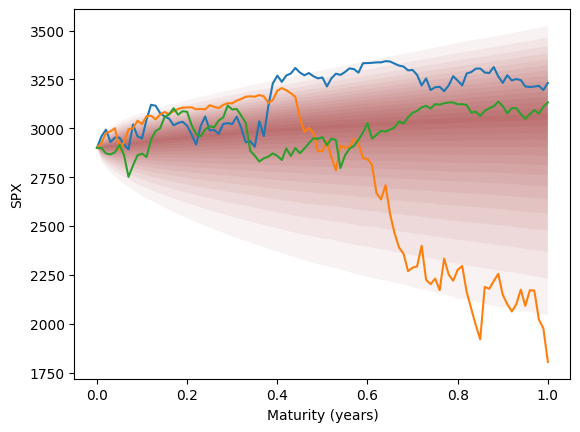

In [ ]:
model.reset(dataset)
plot_asset(model, asset_name)

### Plot the Implied Volatility Surface, and ATM Volatilities.

In [ ]:
# Calculate the implied volatility surface
strikes = np.linspace(2000, 3400, 15)
expirations = np.array([1 / 12, 1 / 6, 1 / 4, 1 / 2, 1])
model.reset(dataset)
surface, atm_vols, fwds = iv_surface_sim(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)

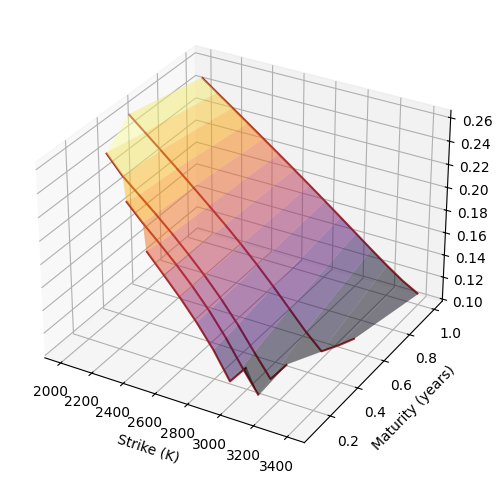

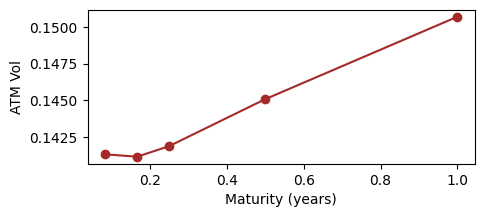

In [ ]:
plot_iv(strikes, expirations, surface, atm_vols, fwds)